In [305]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from joblib import dump,load

In [2]:
mydata=pd.read_excel('C:/Users/Lenovo/Downloads/CaseStudy/BankReviews.xlsx')
mydata

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [3]:
mydata=mydata.loc[:,['Reviews','Stars']]

In [4]:
mydata

,Reviews,Stars
0,"Great job, Wyndham Capital! Each person was pr...",5
1,Matthew Richardson is professional and helpful...,5
2,We had a past experience with Wyndham Mortgage...,5
3,We have been dealing with Brad Thomka from the...,5
4,I can't express how grateful I am for the supp...,5
...,...,...
500,\r\nI never write reviews but had to this time...,1
501,\r\nIt all started when Bob G ran a credit che...,1
502,\r\nWhat a horrible experience. We have excell...,1
503,"\r\nRep was extremely professional, friendly, ...",1


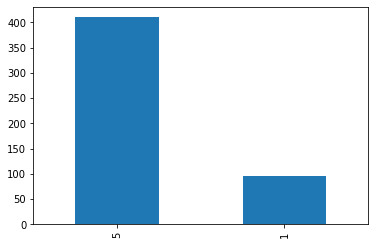

In [5]:
mydata.Stars.value_counts().plot(kind='bar')

In [6]:
corpus =[]
for i in range(0,len(mydata.Reviews)):
    review = re.sub(r'\W', ' ', str(mydata.Reviews[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [7]:
corpus

['great job wyndham capital each person was professional and helped us move through our refinance process smoothly thank you ',
 'matthew richardson is professional and helpful he helped us find the correct product for our mortgage thank you very much for the excellent service matthew ',
 'we had a past experience with wyndham mortgage and would without question use again and again if needed wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan but they pulled together and found a viable option for us that ultimately saved us money we would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needs sincerest thanks wyndham ed lind',
 'we have been dealing with brad thomka from the beginning of what started out to be a very stressful time for us but with the help from brad and the entire wyndham mortgage team it was turned into a happy ending brad and wyndham went beyond the extra m

In [8]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words =[lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)


In [9]:
from nltk.corpus import stopwords

for i in range(len(corpus)):
    words=nltk.word_tokenize(str(corpus[i]))
    word = [word for word in words if word not in stopwords.words('english')]
    corpus[i] = ' '.join(word)


In [10]:
corpus

['great job wyndham capital person wa professional helped u move refinance process smoothly thank',
 'matthew richardson professional helpful helped u find correct product mortgage thank much excellent service matthew',
 'past experience wyndham mortgage would without question use needed wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option u ultimately saved u money would highly recommend brad thomka wyndham capital mortgage team mortgage need sincerest thanks wyndham ed lind',
 'dealing brad thomka beginning started stressful time u help brad entire wyndham mortgage team wa turned happy ending brad wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option u ultimately saved u money indebted would highly recommend brad thomka wyndham capital mortgage team mortgage need sincerest thanks wyndham ed lindread le',
 'express grateful support zach provided fami

In [11]:
tagged_words = nltk.pos_tag(nltk.word_tokenize(str(corpus)))

In [12]:
name_entity = nltk.ne_chunk(tagged_words)

In [13]:
len(tagged_words)

21343

## Most Frequent Words

In [14]:
q=TextBlob(str(corpus))

In [15]:
w=dict(q.word_counts)

In [16]:
df=pd.DataFrame.from_dict(w,orient = 'index').reset_index()

In [17]:
df.columns =['words','count']

In [18]:
df

,words,count
0,great,139
1,job,25
2,wyndham,16
3,capital,12
4,person,17
...,...,...
2367,grandson,1
2368,snail,1
2369,kindest,1
2370,empathetic,1


In [19]:
df[df['count'] >10].words.to_list()

['great',
 'job',
 'wyndham',
 'capital',
 'person',
 'wa',
 'professional',
 'helped',
 'u',
 'move',
 'refinance',
 'process',
 'smoothly',
 'thank',
 'helpful',
 'find',
 'product',
 'mortgage',
 'much',
 'excellent',
 'service',
 'past',
 'experience',
 'would',
 'without',
 'question',
 'use',
 'needed',
 'went',
 'beyond',
 'extra',
 'right',
 'dealing',
 'previous',
 'loan',
 'found',
 'option',
 'money',
 'highly',
 'recommend',
 'team',
 'need',
 'thanks',
 'beginning',
 'started',
 'stressful',
 'time',
 'help',
 'entire',
 'happy',
 'le',
 'provided',
 'family',
 'home',
 'purchase',
 'customer',
 'responsiveness',
 'second',
 'thorough',
 'took',
 'along',
 'way',
 'working',
 'pleasure',
 'making',
 'conversation',
 'officer',
 'closing',
 'responsive',
 'impressed',
 'smooth',
 'timely',
 'communication',
 'buying',
 'done',
 'really',
 'care',
 'client',
 'top',
 'everything',
 'back',
 'wonderful',
 'answered',
 'email',
 'immediately',
 'spent',
 'lot',
 'sure',
 'got'

In [20]:
w=df[df['count'] >10].words.to_list()
w

['great',
 'job',
 'wyndham',
 'capital',
 'person',
 'wa',
 'professional',
 'helped',
 'u',
 'move',
 'refinance',
 'process',
 'smoothly',
 'thank',
 'helpful',
 'find',
 'product',
 'mortgage',
 'much',
 'excellent',
 'service',
 'past',
 'experience',
 'would',
 'without',
 'question',
 'use',
 'needed',
 'went',
 'beyond',
 'extra',
 'right',
 'dealing',
 'previous',
 'loan',
 'found',
 'option',
 'money',
 'highly',
 'recommend',
 'team',
 'need',
 'thanks',
 'beginning',
 'started',
 'stressful',
 'time',
 'help',
 'entire',
 'happy',
 'le',
 'provided',
 'family',
 'home',
 'purchase',
 'customer',
 'responsiveness',
 'second',
 'thorough',
 'took',
 'along',
 'way',
 'working',
 'pleasure',
 'making',
 'conversation',
 'officer',
 'closing',
 'responsive',
 'impressed',
 'smooth',
 'timely',
 'communication',
 'buying',
 'done',
 'really',
 'care',
 'client',
 'top',
 'everything',
 'back',
 'wonderful',
 'answered',
 'email',
 'immediately',
 'spent',
 'lot',
 'sure',
 'got'

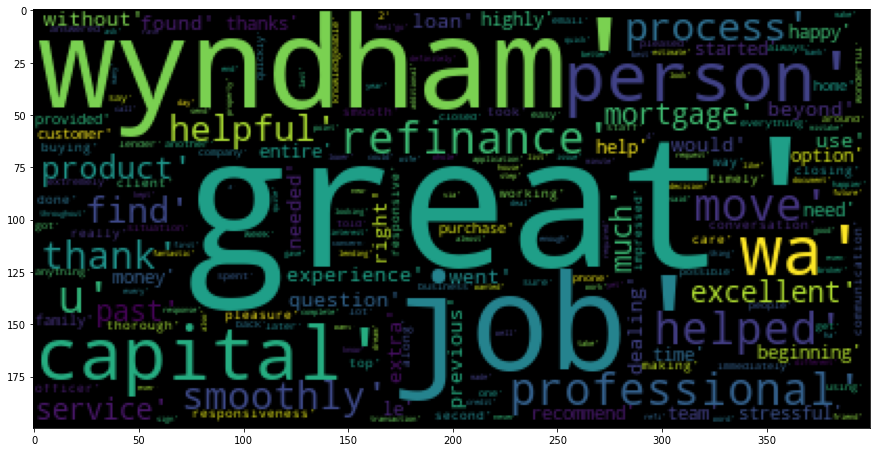

In [21]:
plt.figure(figsize=(15,15))
wc= WordCloud(stopwords=STOPWORDS).generate(text=str(w))
plt.imshow(wc)

## Classification  of review into positive and negative words

In [22]:
mydata['sentiment'] = mydata['Reviews'].apply(lambda x :TextBlob(x).sentiment.polarity)

In [23]:
print('No of positive reviews :',mydata[mydata['sentiment']> 0].shape[0])

No of positive reviews : 466


In [24]:
print('No of negative reviews :',mydata[mydata['sentiment'] < 0].shape[0])

No of negative reviews : 35


In [25]:
print('No of neutral reviews :',mydata[mydata['sentiment']== 0].shape[0])

No of neutral reviews : 4


## Identifying key themes of problems(using clustering,topic models)

### Clusters

In [26]:
vectorizer = TfidfVectorizer(max_df = 0.8,min_df =9)
df=vectorizer.fit_transform(corpus).toarray()
    

In [27]:
df.shape

(505, 425)

In [28]:
p=[]
for i in range(2,21):
    km=KMeans(n_clusters=i)
    km=km.fit(df)
    p.append(km.inertia_)
    
    

In [29]:
p

[460.40873492736523,
 455.819922558385,
 451.7104302401697,
 448.0967625555214,
 444.10530735029295,
 441.42445167823115,
 438.5072677995082,
 435.0960144120721,
 433.66923042354705,
 428.91284859128945,
 423.7406384864182,
 422.59983112743083,
 417.73328498714574,
 414.9163664070257,
 412.9449693767032,
 409.5252948105518,
 405.904882895825,
 404.34490262349334,
 401.1772842995292]

In [30]:
cluster_df = pd.DataFrame({'Cluster_no':np.arange(1,20),'Error':p})

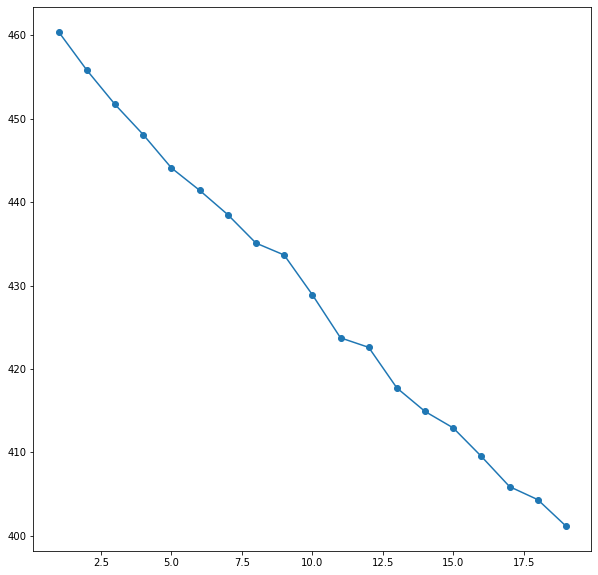

In [31]:
plt.figure(figsize=(10,10))
plt.plot(cluster_df.Cluster_no,cluster_df.Error,marker='o')

In [32]:
km_5=KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
km_5=km_5.fit(df)

In [33]:
print("Top terms per cluster:")
order_centroids = km_5.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i,:20]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 would
 wa
 loan
 recommend
 friend
 closing
 company
 time
 process
 made
 family
 week
 home
 bank
 mr
 read
 ha
 cost
 officer
 adam
Cluster 1:
 wa
 mortgage
 alex
 nasb
 process
 loan
 home
 knowledgeable
 recommend
 entire
 service
 jon
 anyone
 experience
 would
 time
 easy
 looking
 refinance
 worked
Cluster 2:
 wa
 get
 call
 got
 email
 loan
 done
 lender
 closing
 response
 phone
 day
 poor
 even
 company
 contacted
 time
 read
 credit
 rate
Cluster 3:
 rate
 best
 team
 question
 guaranteed
 wa
 loan
 process
 thank
 always
 interest
 possible
 concern
 experience
 peter
 answer
 make
 responsive
 smooth
 easy
Cluster 4:
 wa
 great
 process
 work
 service
 home
 professional
 time
 responsive
 recommend
 always
 team
 helpful
 helped
 first
 experience
 customer
 question
 easy
 made


### Topics Models

In [34]:
lsa = TruncatedSVD( n_components=4)
lsa.fit(df)
lsa.components_
concept_words ={}
terms = vectorizer.get_feature_names()
for i,comp in enumerate(lsa.components_):
    componentTerms = zip(terms,comp)
    sortedTerms = sorted(componentTerms,key=lambda x:x[1],reverse=True)
    sortedTerms = sortedTerms[:15]
    concept_words["Concept "+str(i)] = sortedTerms

In [35]:
concept_words

{'Concept 0': [('wa', 0.3989513586208716),
  ('loan', 0.20489686651526423),
  ('process', 0.2008832852787538),
  ('would', 0.1596239360745955),
  ('home', 0.15752166946088064),
  ('time', 0.15412935925888258),
  ('great', 0.1528851433827756),
  ('recommend', 0.13887276421672654),
  ('work', 0.1310842484154903),
  ('mortgage', 0.130594165194878),
  ('team', 0.11959857823978587),
  ('service', 0.11718642434988336),
  ('read', 0.11214807490878928),
  ('question', 0.10956895846807785),
  ('closing', 0.10954856338875565)],
 'Concept 1': [('great', 0.3986606422426014),
  ('responsive', 0.21137791527640368),
  ('process', 0.19229443101963498),
  ('easy', 0.17477329073536502),
  ('service', 0.17418068403196305),
  ('work', 0.1609327259725179),
  ('always', 0.14425088593258084),
  ('question', 0.14245112957792733),
  ('helpful', 0.12467672388298115),
  ('throughout', 0.12257617980538803),
  ('team', 0.11220403237484017),
  ('knowledgeable', 0.10989583020038891),
  ('jon', 0.10247224442740344),


## Predicting star rating using reviews

In [36]:
corpus

['great job wyndham capital person wa professional helped u move refinance process smoothly thank',
 'matthew richardson professional helpful helped u find correct product mortgage thank much excellent service matthew',
 'past experience wyndham mortgage would without question use needed wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option u ultimately saved u money would highly recommend brad thomka wyndham capital mortgage team mortgage need sincerest thanks wyndham ed lind',
 'dealing brad thomka beginning started stressful time u help brad entire wyndham mortgage team wa turned happy ending brad wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option u ultimately saved u money indebted would highly recommend brad thomka wyndham capital mortgage team mortgage need sincerest thanks wyndham ed lindread le',
 'express grateful support zach provided fami

In [37]:
vectorizer=TfidfVectorizer(max_df=.6,min_df=8)
x=vectorizer.fit_transform(corpus).toarray()
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.37424515,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15207052, 0.69651705,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13025886, 0.        , 0.12805998, ..., 0.06032974, 0.        ,
        0.09105409]])

In [38]:
x.shape

(505, 481)

In [42]:
trainx,testx,trainy,testy=train_test_split(x,mydata.Stars,test_size=0.3,random_state=123)

In [43]:
trainx.shape

(353, 481)

In [44]:
testx.shape

(152, 481)

### Naive Bayes 

In [47]:
nb=GaussianNB()
nb.fit(trainx,trainy)


GaussianNB()

In [48]:
nb.score(trainx,trainy)

0.9575070821529745

In [49]:
nb_test= pd.DataFrame({'actual':testy,'predicted':nb.predict(testx)} )

In [82]:
t_score=metrics.accuracy_score(nb_test.actual,nb_test.predicted)
t_score

0.9144736842105263

In [164]:
report = pd.DataFrame({'Model':['Naive Bayes'],'Test Score':[t_score]})

In [165]:
report

,Model,Test Score
0,Naive Bayes,0.914474


### Logistics Regression 

In [101]:
logreg=LogisticRegression()
logreg.fit(trainx,trainy)
logreg.score(trainx,trainy)

0.9065155807365439

In [102]:
lg_test= pd.DataFrame({'actual':testy,'predicted':logreg.predict(testx)} )

In [103]:
metrics.accuracy_score(lg_test.actual,lg_test.predicted)

0.8026315789473685

In [192]:
report=report.append({'Model':'Logistics Regression','Test Score' : metrics.accuracy_score(lg_test.actual,lg_test.predicted)},ignore_index=True)

In [193]:
report

,Model,Test Score
0,Naive Bayes,0.914474
1,Logistics Regression,0.802632


### Random Forest 

In [ ]:
RandomForestClassifier()

In [127]:
param ={'n_estimators':[100,200,300,400,500],
       'criterion':['gini','entropy']}

gs=GridSearchCV(estimator = RandomForestClassifier(),param_grid=param,n_jobs=-1)
gs.fit(trainx,trainy)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [129]:
gs.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [134]:
gs.best_score_

0.9235412474849094

In [132]:
rf=RandomForestClassifier(n_estimators=200,random_state=123,n_jobs=-1,oob_score=True)
rf.fit(trainx,trainy)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=123)

In [133]:
rf.oob_score_

0.9291784702549575

In [170]:
rf_test= pd.DataFrame({'actual':testy,'predicted':rf.predict(testx)} )
w=metrics.accuracy_score(rf_test.actual,rf_test.predicted)
w

0.8947368421052632

In [196]:
report = report.append({'Model': 'Random Forest','Test Score':w},ignore_index=True)

In [197]:
report

,Model,Test Score
0,Naive Bayes,0.914474
1,Logistics Regression,0.802632
2,Random Forest,0.894737


### ADA -Boost 

In [198]:
AdaBoostClassifier()

In [231]:
param ={'n_estimators':[50,100,150,200,250,300,400,500],
       'learning_rate': [10 **x for x in range(-3,1)]}

In [233]:
gs=GridSearchCV(AdaBoostClassifier(),param,cv=5,n_jobs=-1)
gs.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 400,
                                          500]})

In [235]:
gs.best_params_

{'learning_rate': 1, 'n_estimators': 400}

In [236]:
gs.best_score_

0.9433400402414488

In [237]:
ad=AdaBoostClassifier(n_estimators =400,learning_rate = 1,random_state=123)
ad.fit(trainx,trainy)

AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=123)

In [238]:
ad.score(trainx,trainy)

1.0

In [239]:
ad_test= pd.DataFrame({'actual':testy,'predicted':ad.predict(testx)} )
w=metrics.accuracy_score(ad_test.actual,ad_test.predicted)
w

0.9473684210526315

In [240]:
report =report.append({'Model': 'ADA Boost','Test Score':w},ignore_index=True)

In [245]:
report

,Model,Test Score
0,Naive Bayes,0.914474
1,Logistics Regression,0.802632
2,Random Forest,0.894737
4,ADA Boost,0.947368


### Gradient Boost

In [246]:
gs = GridSearchCV(GradientBoostingClassifier(),param,cv=5,n_jobs=-1)
gs.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 400,
                                          500]})

In [248]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 400}

In [247]:
gs.best_score_

0.9122736418511066

In [249]:
gb=GradientBoostingClassifier(n_estimators = 400,learning_rate=0.1,random_state=123)
gb.fit(trainx,trainy)

GradientBoostingClassifier(n_estimators=400, random_state=123)

In [250]:
gb_test= pd.DataFrame({'actual':testy,'predicted':gb.predict(testx)} )
w=metrics.accuracy_score(gb_test.actual,gb_test.predicted)
w

0.9013157894736842

In [251]:
report =report.append({'Model': 'Gradient Boost','Test Score':w},ignore_index=True)
report

,Model,Test Score
0,Naive Bayes,0.914474
1,Logistics Regression,0.802632
2,Random Forest,0.894737
3,ADA Boost,0.947368
4,Gradient Boost,0.901316


### XG- Boost 

In [262]:

param={'n_estimators':[50,100,200,300,400],
       'max_depth':np.arange(1,20),
     'learning_rate':[10** x for x in range(-3,1)]}

In [263]:
gs=GridSearchCV(XGBClassifier(),param,cv=5,n_jobs=-1)
gs.fit(trainx,trainy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [264]:
gs.best_params_

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 50}

In [265]:
gs.best_score_

0.9235814889336016

In [267]:
xg=XGBClassifier(n_estimators =50,max_depth=1,learning_rate=1)
xg.fit(trainx,trainy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [268]:
xg_test= pd.DataFrame({'actual':testy,'predicted':xg.predict(testx)} )
w=metrics.accuracy_score(xg_test.actual,xg_test.predicted)
w

0.8881578947368421

In [269]:
report =report.append({'Model': 'XG Boost','Test Score':w},ignore_index=True)
report

,Model,Test Score
0,Naive Bayes,0.914474
1,Logistics Regression,0.802632
2,Random Forest,0.894737
3,ADA Boost,0.947368
4,Gradient Boost,0.901316
5,XG Boost,0.888158


### KNN

In [ ]:
KNeighborsClassifier()

In [281]:
param_grid ={'n_neighbors':np.arange(4,40)}

In [283]:
gs=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
gs.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39])})

In [284]:
gs.best_params_

{'n_neighbors': 15}

In [285]:
gs.best_score_

0.9462776659959757

In [286]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(trainx,trainy)

KNeighborsClassifier(n_neighbors=15)

In [287]:
knn_test= pd.DataFrame({'actual':testy,'predicted':knn.predict(testx)} )
w=metrics.accuracy_score(knn_test.actual,knn_test.predicted)
w

0.9276315789473685

In [288]:
report =report.append({'Model': 'KNN','Test Score':w},ignore_index=True)
report

,Model,Test Score
0,Naive Bayes,0.914474
1,Logistics Regression,0.802632
2,Random Forest,0.894737
3,ADA Boost,0.947368
4,Gradient Boost,0.901316
5,XG Boost,0.888158
6,KNN,0.927632


### SVM 

In [290]:
dir(svm)

['LinearSVC',
 'LinearSVR',
 'NuSVC',
 'NuSVR',
 'OneClassSVM',
 'SVC',
 'SVR',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bounds',
 '_classes',
 '_liblinear',
 '_libsvm',
 '_libsvm_sparse',
 'l1_min_c']

In [292]:
sl=svm.LinearSVC(random_state=123)
sl.fit(trainx,trainy)

LinearSVC(random_state=123)

In [293]:
sl.score(trainx,trainy)

0.9971671388101983

In [294]:
sl_test= pd.DataFrame({'actual':testy,'predicted':sl.predict(testx)} )
w=metrics.accuracy_score(sl_test.actual,sl_test.predicted)
w

0.9605263157894737

In [295]:
report =report.append({'Model': 'SVM-LinearSVC','Test Score':w},ignore_index=True)
report

,Model,Test Score
0,Naive Bayes,0.914474
1,Logistics Regression,0.802632
2,Random Forest,0.894737
3,ADA Boost,0.947368
4,Gradient Boost,0.901316
5,XG Boost,0.888158
6,KNN,0.927632
7,SVM-LinearSVC,0.960526


### ANN 

In [336]:
mlp=MLPClassifier()
mlp.fit(trainx,trainy)

MLPClassifier()

In [337]:
mlp.score(trainx,trainy)

1.0

In [338]:
mlp_data=pd.DataFrame({'act':testy,'pre':mlp.predict(testx)})

In [339]:
metrics.accuracy_score(mlp_data.act,mlp_data.pre)

0.9539473684210527

In [341]:
report =report.append({'Model': 'ANN','Test Score':metrics.accuracy_score(mlp_data.act,mlp_data.pre)},ignore_index=True)

In [342]:
report

,Model,Test Score
0,Naive Bayes,0.914474
1,Logistics Regression,0.802632
2,Random Forest,0.894737
3,ADA Boost,0.947368
4,Gradient Boost,0.901316
5,XG Boost,0.888158
6,KNN,0.927632
7,SVM-LinearSVC,0.960526
9,ANN,0.953947


In [343]:
vectorizer

TfidfVectorizer(max_df=0.6, min_df=8)

In [344]:
#dump(vectorizer,'tfidfvectorizer.joblib')

['tfidfvectorizer.joblib']

In [361]:
#dump(sl,'SVM.linearsvc.joblib')

['SVM.linearsvc.joblib']

In [345]:
clf=load('tfidfvectorizer.joblib')

In [362]:
md= load('SVM.linearsvc.joblib')

In [383]:
a=[input('Enter a Review')]
u=clf.transform(a).toarray()
print('___')

md.predict(u)

Enter a Reviewthis is great bank
___


array([5], dtype=int64)